# Cricket Analysis

Analyze cricket data

## Todo

- Webscrape data
    - ~Obtain data of bowlers with most wickets~
    - ~Obtain bowling styles~
- Data
    - ~Wrangling~
        - ~Seperate bowler nationality/country from name~
    - ~Cleaning~
    - ~EDA~
        - ~See how bowlers compare to line of best fit~
    - ~Visualization~


## Imports

In [2]:
# Basic imports
import pandas as pd
import numpy as np

In [3]:
# Web scraping
import requests
from bs4 import BeautifulSoup

In [4]:
# Plotting/ data visualization/ eda
import seaborn as sns
import matplotlib.pyplot as plt

## Data Aquisition

In [6]:
url = 'https://www.espncricinfo.com/records/most-wickets-in-career-93276'
all_tables_links = pd.read_html(url, extract_links = 'body')
all_tables_nolinks = pd.read_html(url)

In [7]:
df_bowlers = all_tables_nolinks[0]
df_bowlers.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4,5
0,M Muralidaran (ICC/SL),1992-2010,133,230,44039,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67
1,SK Warne (AUS),1992-2007,145,273,40705,6784.1,1761,17995,708,8/71,12/128,25.41,2.65,57.49,48,37
2,JM Anderson (ENG),2003-2023,183,341,39217,6536.1,1700,18234,690,7/42,11/71,26.42,2.78,56.83,32,32
3,A Kumble (IND),1990-2008,132,236,40850,6808.2,1576,18355,619,10/74,14/149,29.65,2.69,65.99,31,35
4,SCJ Broad (ENG),2007-2023,167,309,33698,5616.2,1304,16719,604,8/15,11/121,27.68,2.97,55.79,28,20


### Get Bowling Styles
Obtain player links, and access their espn profile pages to obtain bowling styles 

In [123]:
df_bowler_links = all_tables_links[0]['Player']

'/player/muthiah-muralidaran-49636'

In [128]:
def get_bowling_style(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser') 
    soup = soup.find_all('div', {"class":"ds-grid lg:ds-grid-cols-3 ds-grid-cols-2 ds-gap-4 ds-mb-8"})
    
    souptext = None;
    for s in soup:
        souptext = s.get_text(separator=' ')
    return souptext

In [129]:
bowling_style = [None]*df_bowler_links.size
playerurlbase = 'https://www.espncricinfo.com'
for index,value in df_bowler_links.items():
    currurl = playerurlbase + value[1];
    bowling_style[index] = get_bowling_style(currurl)

In [141]:
bowling_style = pd.Series(bowling_style)
bowling_style = bowling_style.str.extract('Bowling Style (\w+ \w+ \w+ \w+)')

In [143]:
df_bowlers['Bowling Style'] = bowling_style

In [148]:
df_bowlers['Bowling Style'].unique()

array(['Right arm Offbreak Playing', 'Legbreak Googly Playing Role',
       'Right arm Fast medium', 'Right arm Fast Playing',
       'Slow Left arm Orthodox', 'Left arm Fast Playing',
       'Right arm Medium fast', 'Left arm Fast medium',
       'Legbreak Playing Role Bowler', 'Left arm Medium fast', nan],
      dtype=object)

## Data Wrangling
Player names also contain country they are playing for
Extract countries and place in seperate column

In [ ]:
df_bowlers['Country'] = df_bowlers['Player'].str.extract(pat = '\((\w+)\)')
df_bowlers['Player'] = df_bowlers['Player'].str.replace(pat = '\((\w+)\)', repl = "")

In [287]:
df_bowlers = df_bowlers.rename(columns={'BBI':'Best_Innings', 'BBM':'Best_Match', '4':'Four_Wicket_Hauls', '5':'Five_Wicket_Hauls'})

In [154]:
local_savefile = 'test_bowlers_all_time_data'
df_bowlers.to_csv(local_savefile, index = False)

In [255]:
df_bowlers = pd.read_csv('test_bowlers_data')
df_bowlers.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4,5,Bowling Style,Country
0,M Muralidaran (ICC/SL),1992-2010,133,230,44039,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67,Right arm Offbreak Playing,NaN
1,SK Warne,1992-2007,145,273,40705,6784.1,1761,17995,708,8/71,12/128,25.41,2.65,57.49,48,37,Legbreak Googly Playing Role,AUS
2,JM Anderson,2003-2023,183*,340,39025,6504.1,1690,18135,689,7/42,11/71,26.32,2.78,56.64,32,32,Right arm Fast medium,ENG
3,A Kumble,1990-2008,132,236,40850,6808.2,1576,18355,619,10/74,14/149,29.65,2.69,65.99,31,35,Legbreak Googly Playing Role,IND
4,SCJ Broad,2007-2023,167*,308,33502,5583.4,1297,16621,600,8/15,11/121,27.70,2.97,55.83,28,20,Right arm Fast medium,ENG


## Data Cleaning

In [256]:
df_bowlers.isna().sum()

Player           0
Span             0
Mat              0
Inns             0
Balls            0
Overs            0
Mdns             0
Runs             0
Wkts             0
BBI              0
BBM              0
Ave              0
Econ             0
SR               0
4                0
5                0
Bowling Style    2
Country          5
dtype: int64

#### Adjusting Nan Values Country

In [257]:
df_bowlers[df_bowlers['Country'].isna()]

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4,5,Bowling Style,Country
0,M Muralidaran (ICC/SL),1992-2010,133,230,44039,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67,Right arm Offbreak Playing,NaN
23,DL Vettori (ICC/NZ),1997-2014,113,187,28814,4802.2,1197,12441,362,7/87,12/149,34.36,2.59,79.59,19,20,Slow Left arm Orthodox,NaN
38,JH Kallis (ICC/SA),1995-2013,166,272,20232,3372.0,848,9535,292,6/54,9/92,32.65,2.82,69.28,7,5,Right arm Fast medium,NaN
68,SJ Harmison (ENG/ICC),2002-2009,63,115,13375,2229.1,431,7192,226,7/12,11/76,31.82,3.22,59.18,11,8,Right arm Fast medium,NaN
69,A Flintoff (ENG/ICC),1998-2009,79,137,14951,2491.5,507,7410,226,5/58,8/156,32.78,2.97,66.15,11,3,Right arm Fast medium,NaN


In [258]:
# df_bowlers[df_bowlers['Country'].isna()]['Country'] = df_bowlers[df_bowlers['Country'].isna()]['Player'].str.extract("\((\w+/\w+)\)")

In [259]:
nan_country = df_bowlers.loc[df_bowlers['Country'].isnull(), 'Player'].str.extract("\((\w+/\w+)\)")
nan_country.rename(columns={0:'Country'}, inplace=True)
df_bowlers.update(other = nan_country)

In [260]:
df_bowlers['Player'] = df_bowlers['Player'].str.replace(pat = "\((\w+/\w+)\)", repl = "")
df_bowlers['Player']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6072\3264699372.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_bowlers['Player'] = df_bowlers['Player'].str.replace(pat = "\((\w+/\w+)\)", repl = "")


0       M Muralidaran 
1            SK Warne 
2         JM Anderson 
3            A Kumble 
4           SCJ Broad 
            ...       
77    Saqlain Mushtaq 
78        AME Roberts 
79            JA Snow 
80             MM Ali 
81         JR Thomson 
Name: Player, Length: 82, dtype: object

In [261]:
df_bowlers.isna().sum()

Player           0
Span             0
Mat              0
Inns             0
Balls            0
Overs            0
Mdns             0
Runs             0
Wkts             0
BBI              0
BBM              0
Ave              0
Econ             0
SR               0
4                0
5                0
Bowling Style    2
Country          0
dtype: int64

#### Clean null values in Bowling Style

In [262]:
df_bowlers.loc[df_bowlers['Bowling Style'].isna()]

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4,5,Bowling Style,Country
67,RR Lindwall,1946-1960,61,113,13650,-,419,5251,228,7/38,9/70,23.03,2.30,59.86,8,12,NaN,AUS
73,CV Grimmett,1925-1936,37,67,14513,-,736,5231,216,7/40,14/199,24.21,2.16,67.18,7,21,NaN,AUS


In [264]:
local_savefile = 'test_bowlers_data'
df_bowlers.to_csv(local_savefile, index = False)
df_bowlers = pd.read_csv('test_bowlers_data')
df_bowlers.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4,5,Bowling Style,Country
0,M Muralidaran,1992-2010,133,230,44039,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67,Right arm Offbreak Playing,ICC/SL
1,SK Warne,1992-2007,145,273,40705,6784.1,1761,17995,708,8/71,12/128,25.41,2.65,57.49,48,37,Legbreak Googly Playing Role,AUS
2,JM Anderson,2003-2023,183*,340,39025,6504.1,1690,18135,689,7/42,11/71,26.32,2.78,56.64,32,32,Right arm Fast medium,ENG
3,A Kumble,1990-2008,132,236,40850,6808.2,1576,18355,619,10/74,14/149,29.65,2.69,65.99,31,35,Legbreak Googly Playing Role,IND
4,SCJ Broad,2007-2023,167*,308,33502,5583.4,1297,16621,600,8/15,11/121,27.70,2.97,55.83,28,20,Right arm Fast medium,ENG


#### Cleanup Bowling Styles
Classify bowling style as offspin,legspin,fast bowling

In [265]:
df_bowlers['Bowling Style'].unique()

array(['Right arm Offbreak Playing', 'Legbreak Googly Playing Role',
       'Right arm Fast medium', 'Right arm Fast Playing',
       'Slow Left arm Orthodox', 'Left arm Fast Playing',
       'Right arm Medium fast', 'Left arm Fast medium',
       'Legbreak Playing Role Bowler', 'Left arm Medium fast', nan],
      dtype=object)

In [276]:
df_bowlers = df_bowlers.dropna()

In [281]:
df_bowlers.loc[df_bowlers['Bowling Style'].str.contains('Fast', case = False), 'Bowling Style'] = 'Fast'
df_bowlers.loc[df_bowlers['Bowling Style'].str.contains('Legbreak'), 'Bowling Style'] = 'Legspin'
df_bowlers.loc[df_bowlers['Bowling Style'].str.contains('Offbreak'), 'Bowling Style'] = 'Offspin'
df_bowlers.loc[df_bowlers['Bowling Style'].str.contains('Orthodox'), 'Bowling Style'] = 'Legspin'

In [282]:
df_bowlers['Bowling Style'].unique()

array(['Offspin', 'Legspin', 'Fast'], dtype=object)

In [284]:
df_bowlers.head()

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,BBM,Ave,Econ,SR,4,5,Bowling Style,Country
0,M Muralidaran,1992-2010,133,230,44039,7339.5,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67,Offspin,ICC/SL
1,SK Warne,1992-2007,145,273,40705,6784.1,1761,17995,708,8/71,12/128,25.41,2.65,57.49,48,37,Legspin,AUS
2,JM Anderson,2003-2023,183*,340,39025,6504.1,1690,18135,689,7/42,11/71,26.32,2.78,56.64,32,32,Fast,ENG
3,A Kumble,1990-2008,132,236,40850,6808.2,1576,18355,619,10/74,14/149,29.65,2.69,65.99,31,35,Legspin,IND
4,SCJ Broad,2007-2023,167*,308,33502,5583.4,1297,16621,600,8/15,11/121,27.70,2.97,55.83,28,20,Fast,ENG


In [25]:
df_bowlers.dtypes

Player                object
Span                  object
Mat                   object
Inns                   int64
Balls                  int64
Overs                 object
Mdns                   int64
Runs                   int64
Wkts                   int64
Best_Innings          object
Best_Match            object
Ave                  float64
Econ                 float64
SR                   float64
Four_Wicket_Hauls      int64
Five_Wicket_Hauls      int64
Bowling Style         object
Country               object
dtype: object

#### Cleaning up Overs column datatypes

In [28]:
df_bowlers['Overs'].unique

<bound method Series.unique of 0     7339.5
1     6784.1
2     6504.1
3     6808.2
4     5583.4
       ...  
75    2345.0
76         -
77         -
78    2078.4
79         -
Name: Overs, Length: 80, dtype: object>

In [29]:
df_bowlers.loc[df_bowlers['Overs'] == '-']

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,Best_Innings,Best_Match,Ave,Econ,SR,Four_Wicket_Hauls,Five_Wicket_Hauls,Bowling Style,Country
12,Sir RJ Hadlee,1973-1990,86,150,21918,-,809,9611,431,9/52,15/123,22.29,2.63,50.85,25,36,Fast,NZ
18,IT Botham,1977-1992,102,168,21815,-,788,10878,383,8/34,13/106,28.40,2.99,56.95,17,27,Fast,ENG
22,Imran Khan,1971-1992,88,142,19458,-,727,8258,362,8/58,14/116,22.81,2.54,53.75,17,23,Fast,PAK
24,DK Lillee,1971-1984,70,132,18467,-,652,8493,355,7/83,11/123,23.92,2.75,52.01,23,23,Fast,AUS
28,RGD Willis,1971-1984,90,165,17357,-,554,8190,325,8/43,9/92,25.20,2.83,53.40,12,16,Fast,ENG
35,LR Gibbs,1958-1976,79,148,27115,-,1313,8989,309,8/38,11/157,29.09,1.98,87.75,11,18,Offspin,WI
36,FS Trueman,1952-1965,67,127,15178,-,522,6625,307,8/31,12/119,21.57,2.61,49.43,19,17,Fast,ENG
37,DL Underwood,1966-1982,86,151,21862,-,1239,7674,297,8/51,13/71,25.83,2.10,73.60,13,17,Legspin,ENG
42,BS Bedi,1966-1979,67,118,21364,-,1096,7637,266,7/98,10/194,28.71,2.14,80.31,13,14,Legspin,IND
49,JB Statham,1951-1965,70,129,16056,-,595,6261,252,7/39,11/97,24.84,2.33,63.71,9,9,Fast,ENG


In [48]:
#Drop overs since we have no of balls bowled
df_bowlers = df_bowlers.drop(['Overs'], axis = 'columns')
df_bowlers.head()

,Player,Span,Mat,Inns,Balls,Mdns,Runs,Wkts,Best_Innings,Best_Match,Ave,Econ,SR,Four_Wicket_Hauls,Five_Wicket_Hauls,Bowling Style,Country
0,M Muralidaran,1992-2010,133,230,44039,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67,Offspin,ICC/SL
1,SK Warne,1992-2007,145,273,40705,1761,17995,708,8/71,12/128,25.41,2.65,57.49,48,37,Legspin,AUS
2,JM Anderson,2003-2023,183,340,39025,1690,18135,689,7/42,11/71,26.32,2.78,56.64,32,32,Fast,ENG
3,A Kumble,1990-2008,132,236,40850,1576,18355,619,10/74,14/149,29.65,2.69,65.99,31,35,Legspin,IND
4,SCJ Broad,2007-2023,167,308,33502,1297,16621,600,8/15,11/121,27.70,2.97,55.83,28,20,Fast,ENG


#### Cleanup Matches column
Active players have `'*'` beside no of matches, and matches is object datatype.
Remove `'*'` and cast to int

In [49]:
df_bowlers['Mat'].unique

<bound method Series.unique of 0     133
1     145
2     183
3     132
4     167
     ... 
75     49
76     47
77     49
78     68
79     51
Name: Mat, Length: 80, dtype: int64>

In [37]:
df_bowlers['Mat'] = df_bowlers['Mat'].str.replace(pat = '\*', repl = "")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6204\2185154587.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_bowlers['Mat'] = df_bowlers['Mat'].str.replace(pat = '\*', repl = "")


In [40]:
df_bowlers['Mat'] = df_bowlers['Mat'].astype('int64')

In [43]:
df_bowlers.dtypes

Player                object
Span                  object
Mat                    int64
Inns                   int64
Balls                  int64
Overs                 object
Mdns                   int64
Runs                   int64
Wkts                   int64
Best_Innings          object
Best_Match            object
Ave                  float64
Econ                 float64
SR                   float64
Four_Wicket_Hauls      int64
Five_Wicket_Hauls      int64
Bowling Style         object
Country               object
dtype: object

In [50]:
local_savefile = 'test_bowlers_all_time_data'
df_bowlers.to_csv(local_savefile, index = False)

## Data Analysis

#### Analyze performance by bowling style

In [5]:
df_bowlers = pd.read_csv('test_bowlers_all_time_data')
df_bowlers.head()

,Player,Span,Mat,Inns,Balls,Mdns,Runs,Wkts,Best_Innings,Best_Match,Ave,Econ,SR,Four_Wicket_Hauls,Five_Wicket_Hauls,Bowling Style,Country
0,M Muralidaran,1992-2010,133,230,44039,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67,Offspin,ICC/SL
1,SK Warne,1992-2007,145,273,40705,1761,17995,708,8/71,12/128,25.41,2.65,57.49,48,37,Legspin,AUS
2,JM Anderson,2003-2023,183,340,39025,1690,18135,689,7/42,11/71,26.32,2.78,56.64,32,32,Fast,ENG
3,A Kumble,1990-2008,132,236,40850,1576,18355,619,10/74,14/149,29.65,2.69,65.99,31,35,Legspin,IND
4,SCJ Broad,2007-2023,167,308,33502,1297,16621,600,8/15,11/121,27.70,2.97,55.83,28,20,Fast,ENG


In [9]:
df_bowlers.dtypes

Player                object
Span                  object
Mat                    int64
Inns                   int64
Balls                  int64
Mdns                   int64
Runs                   int64
Wkts                   int64
Best_Innings          object
Best_Match            object
Ave                  float64
Econ                 float64
SR                   float64
Four_Wicket_Hauls      int64
Five_Wicket_Hauls      int64
Bowling Style         object
Country               object
dtype: object

In [90]:
#Average among players grouped by bowling style
df_bowlers_styles = df_bowlers.groupby(by = 'Bowling Style').mean(numeric_only = True)

<Axes: >

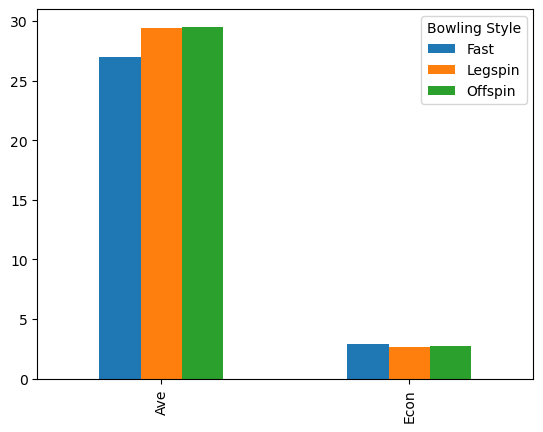

In [91]:
# Ave is no of runs conceded per wicket
# Econ is no of runs conceded per over
# Ave and Econ are already normalized
df_bowlers_styles_transposed = df_bowlers_styles.transpose()
df_bowlers_styles_transposed.loc[['Ave', 'Econ'], :].plot.bar()

On average (among players of same style), legspinners have superior average and superior economy to offspinners as seen above

In [92]:
df_bowlers_styles

,Mat,Inns,Balls,Mdns,Runs,Wkts,Ave,Econ,SR,Four_Wicket_Hauls,Five_Wicket_Hauls
Bowling Style,,,,,,,,,,,
Fast,82.586207,149.689655,17474.965517,663.034483,8336.344828,313.689655,26.941724,2.890172,56.189655,15.655172,14.275862
Legspin,79.285714,141.714286,21864.500000,862.357143,9609.928571,330.857143,29.422143,2.667143,66.834286,17.000000,19.857143
Offspin,88.500000,160.875000,24770.000000,898.375000,11129.750000,396.875000,29.525000,2.777500,64.486250,19.625000,25.250000


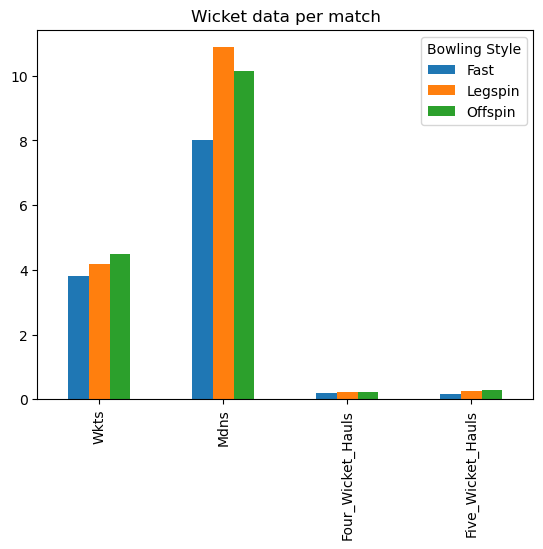

In [102]:
# Normalized by no of matches
df_bowlers_styles_norm = df_bowlers_styles.divide(df_bowlers_styles['Mat'], axis = 0)
ax = df_bowlers_styles_norm.transpose().loc[['Wkts', 'Mdns','Four_Wicket_Hauls', 'Five_Wicket_Hauls'], :].plot.bar()
ax.set_title('Wicket data per match');

The above plot suggests that offspinners take more wickets per match than legspinners. Since legspinners have better averages, this could be due to offspinners being utilized for more overs. 

The above data was normalized to matches. However innings (and balls) are more precise representation of 'how much' players are utilized. 

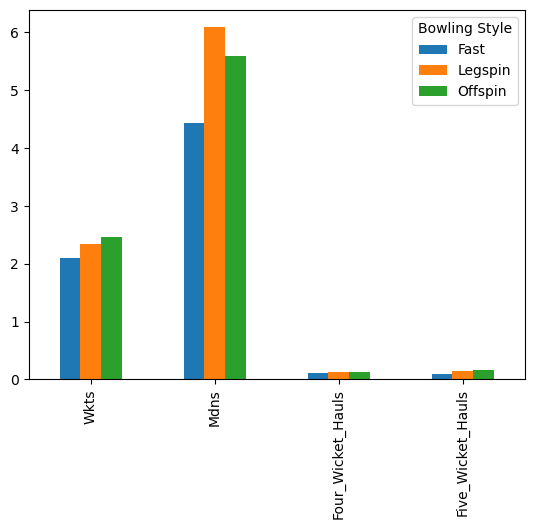

In [103]:
# Normalized by no of innings
df_bowlers_styles_norm = df_bowlers_styles.divide(df_bowlers_styles['Inns'], axis = 0)
df_bowlers_styles_norm.transpose().loc[['Wkts', 'Mdns', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'], :].plot.bar()
ax.set_title('Wicket data per inning');

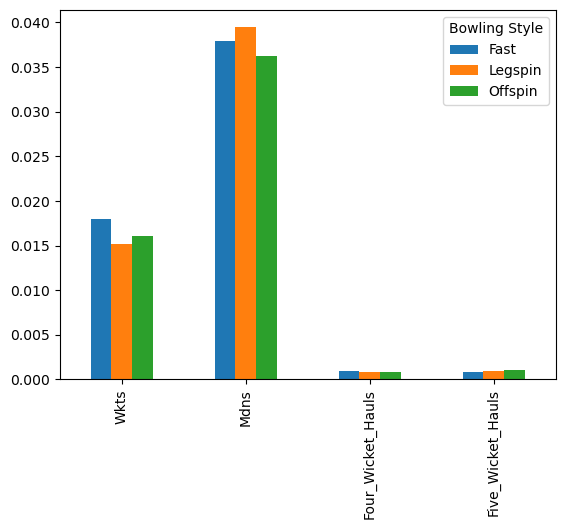

In [104]:
# Normalized by no of balls
df_bowlers_styles_norm = df_bowlers_styles.divide(df_bowlers_styles['Balls'], axis = 0)
df_bowlers_styles_norm.transpose().loc[['Wkts', 'Mdns', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'], :].plot.bar()
ax.set_title('Wicket data per ball');

This bar chart shows fast bowlers have the most wickets per ball. Since they have the least wickets per inning, we can conclude that fast bowlers are the least utilized. This is reasonable since fastbowlers get tired and therefore can bowl fewer balls per innings than test bowlers.

However, off spinners have more wickets per ball than legspinners. This suggests that elite offspinners are more likely to get wickets than elite legspinners per ball. However, offspinners are also more likely to be punished for runs given their higher average and economies, and lower number of maiden overs per inning.

Also keep in mind that this dataset consists of the most elite test bowlers, all of whom are outliers in some sense and therefore could skew the data

#### Analyze Unique Players

In [116]:
import matplotlib.pyplot as plt

In [114]:
df_bowlers.head()

,Player,Span,Mat,Inns,Balls,Mdns,Runs,Wkts,Best_Innings,Best_Match,Ave,Econ,SR,Four_Wicket_Hauls,Five_Wicket_Hauls,Bowling Style,Country
0,M Muralidaran,1992-2010,133,230,44039,1794,18180,800,9/51,16/220,22.72,2.47,55.04,45,67,Offspin,ICC/SL
1,SK Warne,1992-2007,145,273,40705,1761,17995,708,8/71,12/128,25.41,2.65,57.49,48,37,Legspin,AUS
2,JM Anderson,2003-2023,183,340,39025,1690,18135,689,7/42,11/71,26.32,2.78,56.64,32,32,Fast,ENG
3,A Kumble,1990-2008,132,236,40850,1576,18355,619,10/74,14/149,29.65,2.69,65.99,31,35,Legspin,IND
4,SCJ Broad,2007-2023,167,308,33502,1297,16621,600,8/15,11/121,27.70,2.97,55.83,28,20,Fast,ENG


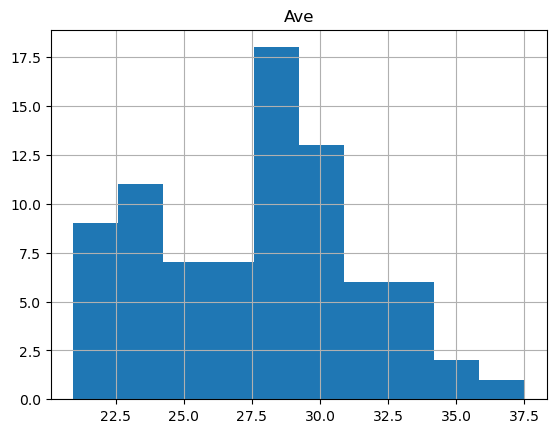

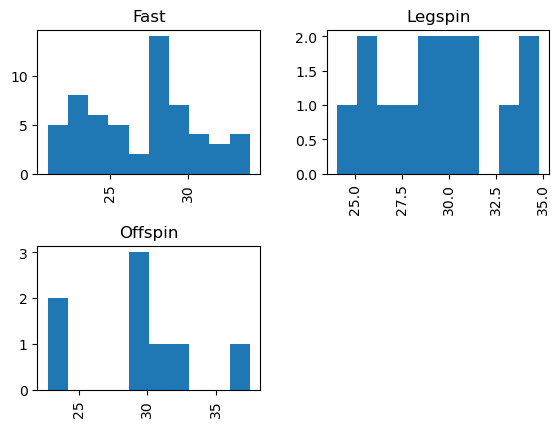

In [126]:
df_bowlers.hist(column = 'Ave')
df_bowlers.hist(column = 'Ave', by = 'Bowling Style');

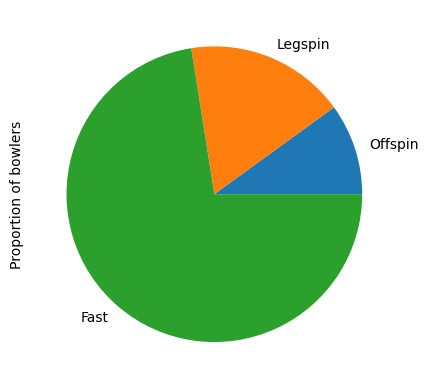

In [93]:
ax = df_bowlers['Bowling Style'].value_counts().reindex(df_bowlers['Bowling Style'].unique()).plot.pie()
ax.set_ylabel('Proportion of bowlers');

In [91]:
bowler_percent_counts = df_bowlers['Bowling Style'].value_counts()/df_bowlers.shape[0]
bowler_percent_counts = bowler_percent_counts*100
bowler_percent_counts

Bowling Style
Fast       72.5
Legspin    17.5
Offspin    10.0
Name: count, dtype: float64

Interestingly the list is dominated by fastbowlers, with very few spinners. 

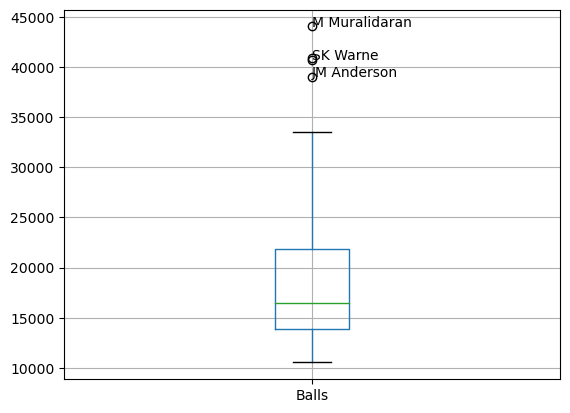

In [55]:
bowler_boxplot_ax = df_bowlers.boxplot(column = 'Balls')
for value in df_bowlers.itertuples():
    if value[0] == 3:
        break
    bowler_boxplot_ax.annotate(text = value[1], xy = (1, value[5]))

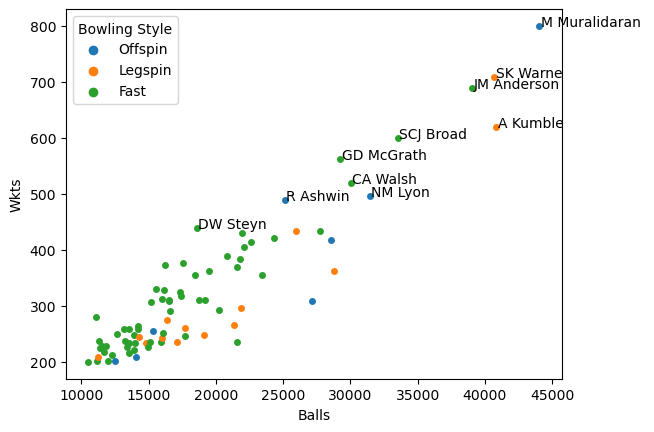

In [5]:
fig,ax = plt.subplots()
ax = sns.stripplot(data = df_bowlers, x = 'Balls', y = 'Wkts', hue = 'Bowling Style', native_scale=True)

for value in df_bowlers.itertuples():
    if value[0] == 10:
        break
    
    ax.annotate(text = value[1], xy = (value[5]+100, value[8]))

Notice that fastbowlers comprise only half of the top 10 wicket takers although `72.5%` of bowlers in this dataset are fastbowlers.

### Bowler performance
Create a linear regression to predict no of wickets, and see which of the top 10 bowlers perform better than expected

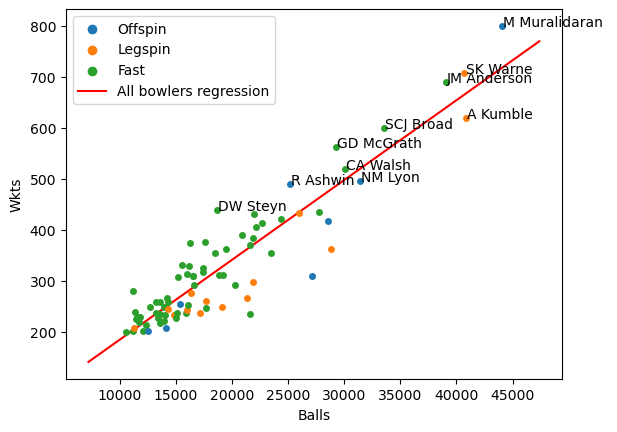

In [13]:
fig,ax = plt.subplots()
ax = sns.stripplot(data = df_bowlers, x = 'Balls', y = 'Wkts', hue = 'Bowling Style', native_scale=True)

for value in df_bowlers.itertuples():
    if value[0] == 10:
        break
    
    ax.annotate(text = value[1], xy = (value[5]+100, value[8]))

ax.plot(wickets_line_x, wickets_line_y, 'r', label = 'All bowlers regression');
plt.legend();

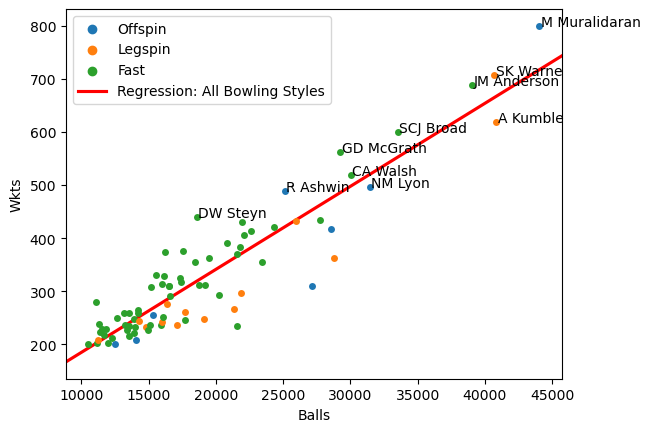

In [22]:
ax = sns.stripplot(data = df_bowlers, x = 'Balls', y = 'Wkts', hue = 'Bowling Style', native_scale=True)
for value in df_bowlers.itertuples():
    if value[0] == 10:
        break
    
    ax.annotate(text = value[1], xy = (value[5]+100, value[8]))

reg_label = 'Regression: All Bowling Styles'
sns.regplot(x = 'Balls' ,y = 'Wkts', data = df_bowlers, scatter = False, ci=None, color = 'red', label = reg_label, truncate = False)
plt.legend();

Notice that Muralidaran and Warne (among others) are quite clearly above the line of best fit, suggesting their performance is significantly above even other all time elite bowlers, suggesting they are elites among elites. However, this data largely consists of outliers, which may skew the data. Moreover, both Murali and Warne are outliers both in no of balls and wickets. It is difficult to determine causality here; most likely, they performed well early on, which in turn resulted in them getting oppotunities to bowl more and obtain more wickets. 


Among the top bowlers, Kumble and Lyon fall below the line, suggesting their performances are poorer than one may expect for an elite bowler. SincetThe dataset is largely comprised of fastbowlers, the line of best fit is biased to elite fast bowlers. Most leg spinners lie below the line which could also explain Kubmble's performance.

An alternative would be to obtain a linear regression by bowling style and compare our bowlers to their respective lines. However there are too few off and leg spinners to get an accurate model. Future work could obtain more offspinner and legspinner data and analyze bowlers against others of the same style.